       date  Sessions  Running_Sum date_str
0   2020-02      2795         2795  2020-02
1   2020-03      1833         4628  2020-03
2   2020-04       268         4896  2020-04
3   2020-05       264         5160  2020-05
4   2020-06       479         5639  2020-06
5   2020-07      3835         9474  2020-07
6   2020-08     18173        27647  2020-08
7   2020-09     20270        47917  2020-09
8   2020-10     29002        76919  2020-10
9   2020-11     47600       124519  2020-11
10  2020-12     77401       201920  2020-12
11  2021-01    110004       311924  2021-01
12  2021-02     70327       382251  2021-02
13  2021-03     31866       414117  2021-03
14  2021-04     30495       444612  2021-04
15  2021-05     27442       472054  2021-05
16  2021-06     24724       496778  2021-06
17  2021-07     20394       517172  2021-07
18  2021-08     14518       531690  2021-08
19  2021-09     77648       609338  2021-09
20  2021-10     87366       696704  2021-10
21  2021-11     31306       7280

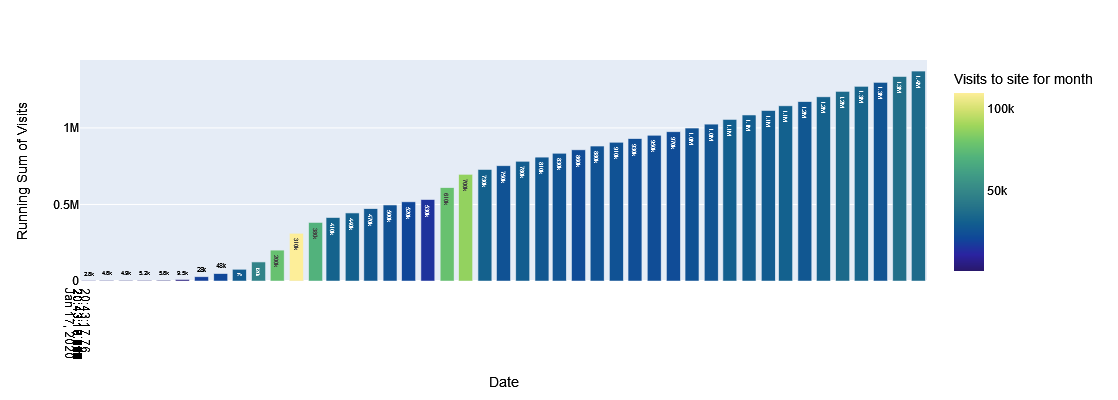

In [14]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.express as px

store = pd.read_csv('data_store.csv') # data store
df = pd.read_csv('new_data.csv') #new file

df = pd.concat([df, store]) # add new data to old 

df['Date'] = pd.to_datetime(df['Date'], format='mixed', dayfirst=True) #format date coloumn 

df.drop_duplicates(subset=['Date'], inplace=True)#remove duplicate data 

df.to_csv('data_store.csv', index=False) #save concatinated data to data store file 

df['date'] = df['Date'].dt.to_period('M') #format new data coloumn 

edf = df.groupby('date')['Sessions'].agg('sum').reset_index() #agrigate data by sum on new date coloumn 
edf.columns=['date', 'Sessions']

edf.to_csv('organized data.csv', index=False) #save this to a csv file 


graph_data = edf #create new df to format data to display a graph

graph_data['Running_Sum'] = graph_data['Sessions'].cumsum() #perform running sum  
graph_data['date_str'] = graph_data['date'].astype(str)
print(graph_data.head(50))
#plot graph 



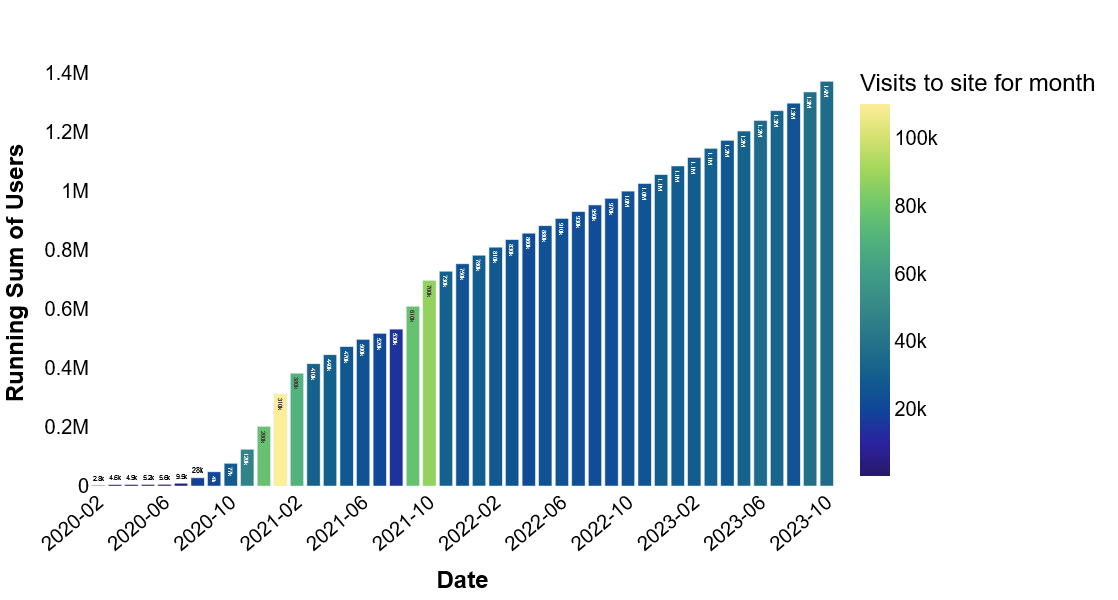

In [109]:
fig = px.bar(graph_data, 
             x='date_str', 
             color='Sessions', 
             y='Running_Sum', 
             height=600, width=1900, 
             color_continuous_scale='haline',
             labels=  ({'Sessions': 'Visits to site for month'}),
             text_auto='.2s')

fig.update_xaxes(
    title='Date',
    type="category",
    ticklabelstep =2,
    tickangle = -40,
)

    
fig.update_layout(
    font_family="Arial",
    font_color="Black",
    font_size=20,
    yaxis_title='<b>Running Sum of Users<b>',
    xaxis_title='<b>Date<b>',
    plot_bgcolor='white',)



fig.show()
fig.write_html('plot.html')
